In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Natural Images CNN/natural_images",
    image_size = (256, 256),
    batch_size = 100,
    shuffle = True
)

Found 6899 files belonging to 8 classes.


In [ ]:
classes = ["airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person"]

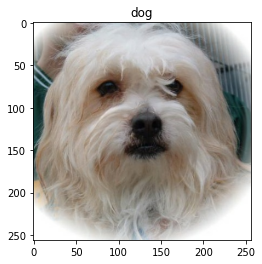

In [ ]:
for image_batch, image_label in dataset.take(1):
  for i in range(100):
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[image_label[i]])


In [ ]:
def get_dataset_partitions(ds = dataset, train_split = 0.8, test_split = 0.1, val_split = 0.1):
  ds = ds.shuffle(10000, seed = 12)
  ds_size = len(ds)
  train_size = int(ds_size * 0.8)
  val_size = int(ds_size * 0.1)
  test_size = int(ds_size * 0.1)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size+val_size)
  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions()

In [ ]:
len(dataset)

69

In [ ]:
len(train_ds)

55

In [ ]:
len(test_ds)

8

In [ ]:
len(val_ds)

6

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(256, 256),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3),input_shape = (100, 256, 256, 3),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2),),
    tf.keras.layers.Conv2D(64, (3, 3),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2),),
    tf.keras.layers.Conv2D(64, (3, 3),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2),),
     tf.keras.layers.Conv2D(64, (3, 3),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2),),
     tf.keras.layers.Conv2D(64, (3, 3),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2),),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    batch_size = 100,
    validation_data=val_ds,
    verbose=1,
    epochs=75
)

Epoch 1/75


In [ ]:
model.evaluate(test_ds)[1]

In [ ]:
import cv2

In [ ]:
img = cv2.imread("cat.jpg")

In [ ]:
img = cv2.resize(img, (256,256))

In [ ]:
img1 = tf.keras.preprocessing.image.load_img("cat.jpg", target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img1)
img_batch = np.expand_dims(img_array, axis=0)

In [ ]:
img_batch.shape

In [ ]:
model.predict(img_batch)